In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('heart.csv')

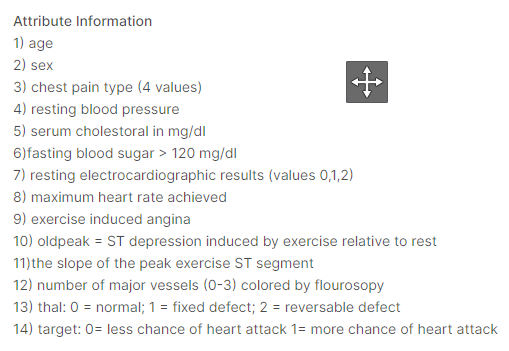

In [3]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

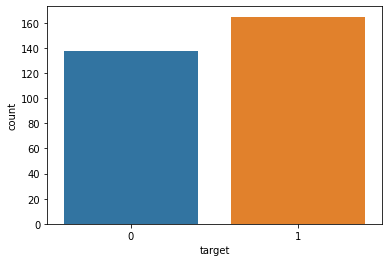

In [6]:
sns.countplot(x = 'target' , data=dataset)

<AxesSubplot:>

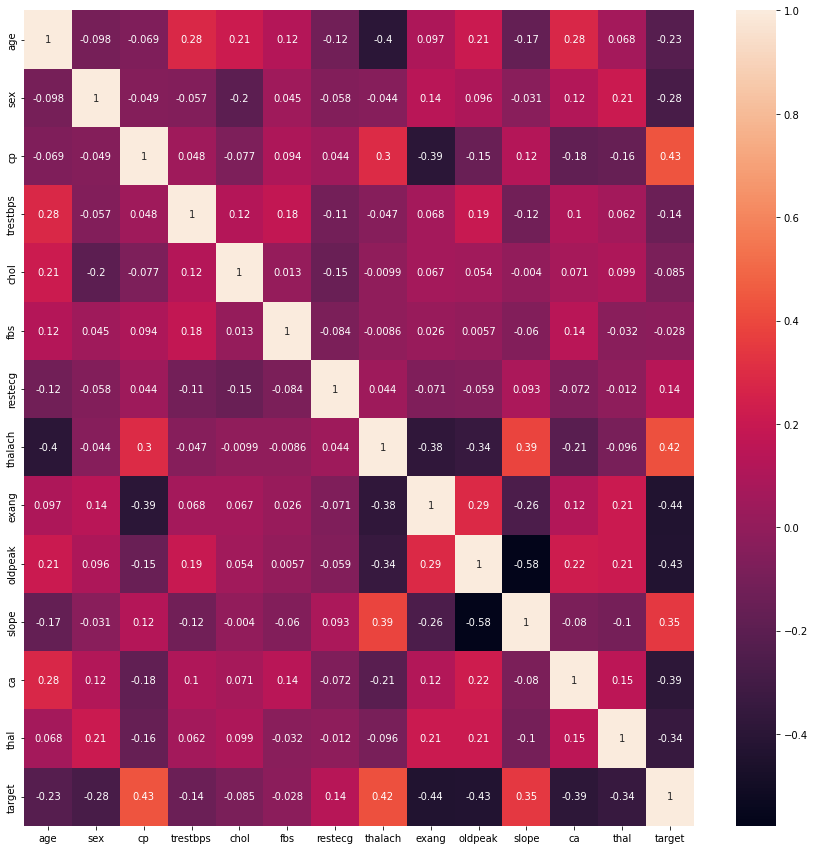

In [7]:
corr_mat = dataset.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_mat , annot=True)

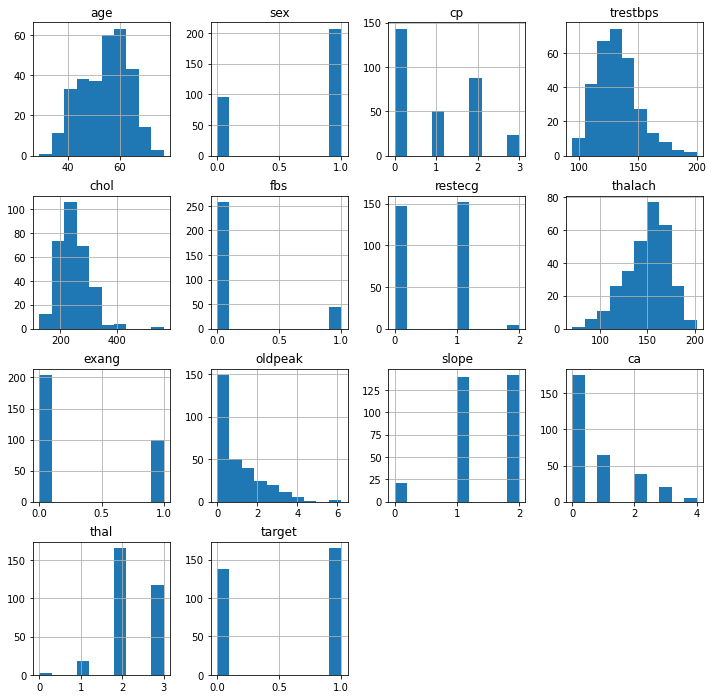

In [8]:
#plot histograms for each column

dataset.hist(figsize=(12,12))
plt.show()

**Now we need to convert some categorical variables into dummy variables**

In [9]:
dataset2 = pd.get_dummies(dataset , columns=['sex' , 'cp' , 'fbs' , 'restecg' , 'exang' , 'slope' , 'ca' , 'thal'])

In [10]:
dataset2.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [55]:
cols = ['age','sex_0','sex_1','cp_0','cp_1','cp_2','cp_3', 'trestbps', 'chol', 'fbs_0','fbs_1', 'restecg_0','restecg_1','restecg_2', 'thalach', 'exang_0','exang_1','oldpeak','slope_0','slope_1','slope_2','ca_0','ca_1','ca_2','ca_3','thal_0','thal_1','thal_2','thal_3'] 

In [56]:
X = dataset2[cols]
y = dataset2.target

In [57]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [58]:
X

,age,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,trestbps,chol,fbs_0,...,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_0,thal_1,thal_2,thal_3
0,63,0,1,0,0,0,1,145,233,0,...,0,0,1,0,0,0,0,1,0,0
1,37,0,1,0,0,1,0,130,250,1,...,0,0,1,0,0,0,0,0,1,0
2,41,1,0,0,1,0,0,130,204,1,...,0,1,1,0,0,0,0,0,1,0
3,56,0,1,0,1,0,0,120,236,1,...,0,1,1,0,0,0,0,0,1,0
4,57,1,0,1,0,0,0,120,354,1,...,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,1,0,1,0,0,0,140,241,1,...,1,0,1,0,0,0,0,0,0,1
299,45,0,1,0,0,0,1,110,264,1,...,1,0,1,0,0,0,0,0,0,1
300,68,0,1,1,0,0,0,144,193,0,...,1,0,0,0,1,0,0,0,0,1
301,57,0,1,1,0,0,0,130,131,1,...,1,0,0,1,0,0,0,0,0,1


In [59]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size=0.25 , random_state = 42)

In [60]:
x_train.shape

(227, 29)

In [61]:
x_test.shape

(76, 29)

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [63]:
x_train

array([[ 0.26745345, -0.71647284,  0.71647284, ..., -0.24647041,
         0.89531408, -0.78830741],
       [ 0.4831264 , -0.71647284,  0.71647284, ...,  4.05728215,
        -1.11692648, -0.78830741],
       [ 1.34581817, -0.71647284,  0.71647284, ..., -0.24647041,
        -1.11692648,  1.26854066],
       ...,
       [ 1.56149112, -0.71647284,  0.71647284, ..., -0.24647041,
         0.89531408, -0.78830741],
       [-0.91874774, -0.71647284,  0.71647284, ..., -0.24647041,
        -1.11692648,  1.26854066],
       [ 0.91447229,  1.39572632, -1.39572632, ..., -0.24647041,
         0.89531408, -0.78830741]])

In [64]:
x_test

array([[ 0.26745345, -0.71647284,  0.71647284, ...,  4.05728215,
        -1.11692648, -0.78830741],
       [ 0.4831264 , -0.71647284,  0.71647284, ..., -0.24647041,
        -1.11692648,  1.26854066],
       [ 0.26745345, -0.71647284,  0.71647284, ..., -0.24647041,
        -1.11692648,  1.26854066],
       ...,
       [-0.7030748 , -0.71647284,  0.71647284, ..., -0.24647041,
         0.89531408, -0.78830741],
       [ 1.02230876, -0.71647284,  0.71647284, ...,  4.05728215,
        -1.11692648, -0.78830741],
       [ 0.05178051, -0.71647284,  0.71647284, ..., -0.24647041,
         0.89531408, -0.78830741]])

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
y_pred1= rf.predict(x_test)
accuracy_score(y_test,y_pred1)

0.8421052631578947

In [68]:
from sklearn import svm
svm = svm.SVC()
svm.fit(x_train,y_train)

SVC()

In [69]:
y_pred2= svm.predict(x_test)
accuracy_score(y_test,y_pred2)

0.881578947368421

In [70]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [71]:
y_pred3= dt.predict(x_test)
accuracy_score(y_test,y_pred3)

0.8026315789473685

In [72]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

<AxesSubplot:>

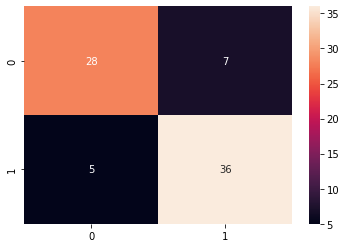

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred1)
sns.heatmap(cm , annot=True)

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred1)

0.8421052631578947

In [75]:
import pickle
pickle.dump(rf , open('model.pkl','wb'))
pickle.dump(sc , open('sc.pkl','wb'))